# 훈련 세트와 테스트 세트

## 훈련 세트와 테스트 세트

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [4]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [5]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)  # 샘플링 편향 발생

0.0

## 넘파이

In [6]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [7]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [8]:
print(input_arr.shape)  # (샘플 수, 특성 수)

(49, 2)


In [9]:
np.random.seed(42)       # 일정한 결과를 얻기 위함
index = np.arange(49)    # arange(): 정수 N을 전달하면 0에서부터 N-1까지 1씩 증가하는 배열 생성
np.random.shuffle(index) # shuffle(): 주어진 배열을 무작위로 섞음

In [10]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [11]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [12]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [13]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

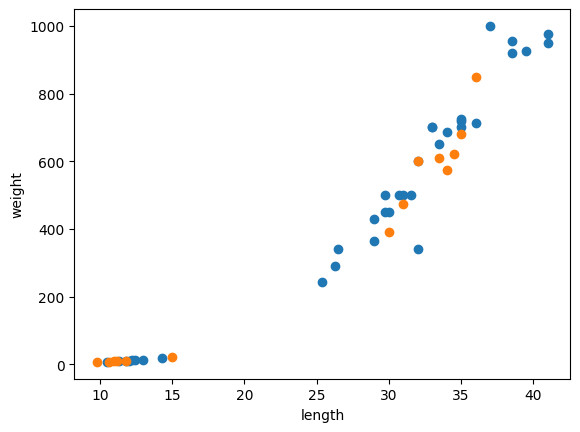

In [14]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램

In [15]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [16]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [17]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리

## 넘파이로 데이터 준비하기

In [18]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [19]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))  # np.column_stack(): 1D 배열을 열 방향으로 쌓음 (2D로 변환)
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [20]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # np.concatenate(): 축을 따라 배열을 이어붙임
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)  # 기본적으로 25%를 테스트 세트로 설정
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [22]:
print(test_target)  # 비율이 맞지 않음('2.5:1'이 아닌 '3.3:1') -> 샘플링 편향 발생

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)  # stratify를 통해 클래스 비율에 맞게 데이터를 나눔
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한 마리

In [24]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [25]:
print(kn.predict([[25, 150]]))  # 도미가 빙어로 판정되는 에러 발생

[0.]


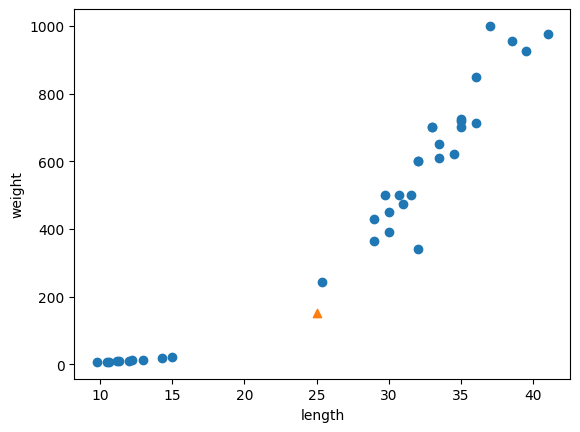

In [26]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
distances, indexes = kn.kneighbors([[25, 150]])  # KNeighborsClassifier().kneighbors(): 특정 샘플 주변의 이웃 데이터를 찾을 때 사용하는 메서드

print(distances)
print(indexes)  # index는 샘플을 나타냄

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


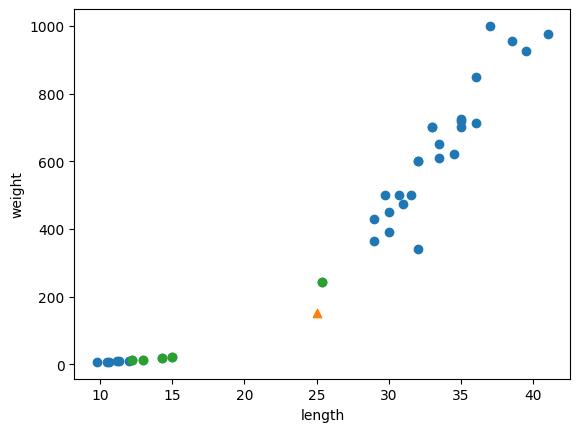

In [28]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='o')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 기준을 맞춰라

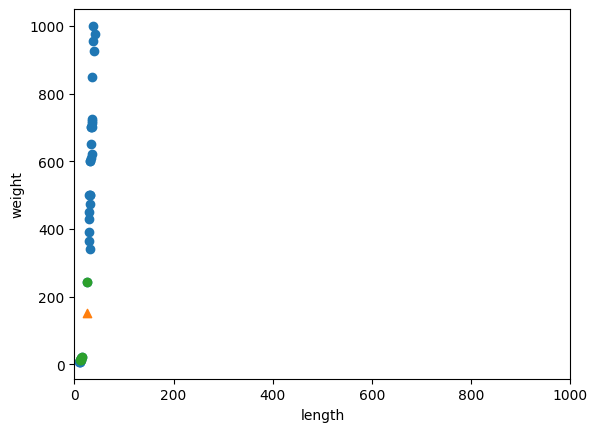

In [29]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='o')
plt.xlim((0, 1000))  # x축의 범위 조절
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
# 평균
mean = np.mean(train_input, axis=0)
# 표준편차
std = np.std(train_input, axis=0)

print(mean, std)  # 훈련 데이터의 평균과 표준편차 계산

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [31]:
# 표준점수(z-점수)로 변환
# 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져있는지 확인하기 위함
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

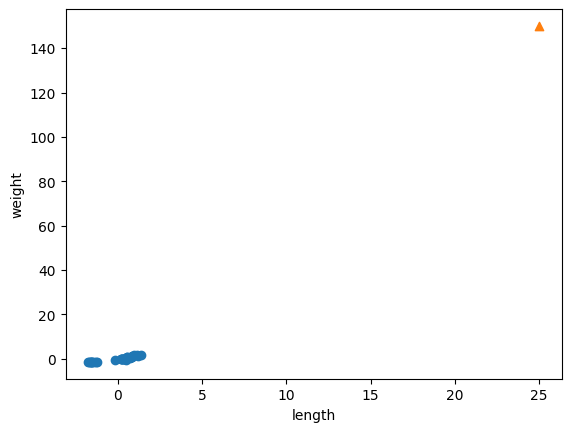

In [32]:
# 샘플 데이터 변환 전
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

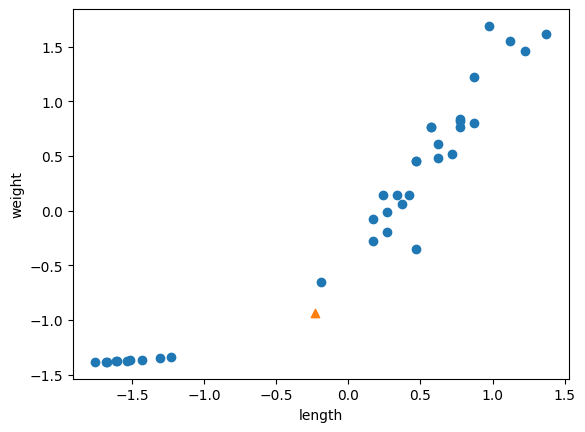

In [33]:
# 샘플 데이터 변환 후
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [35]:
print(kn.predict([new]))

[1.]


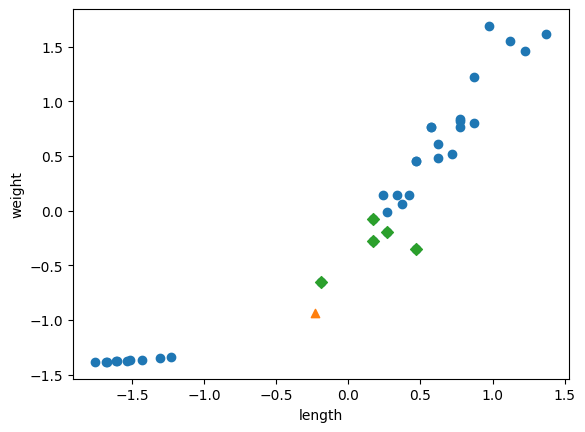

In [36]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()